In [1]:
import pandas as  pd
import numpy as numpy
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
from datetime import timedelta



In [2]:
test = pd.read_csv("test_msa_bb.csv")

C:\Users\mlike\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
test.head()

,email,phone,first_name,last_name,zip,city,state,country,birthday_year,gender,age,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost,conversion_currency,ad_click_id_value
0,5b31baf92171234adacc3aaf0ee5a14cf0b1adb35194,3567550f9cf51d6b9fe94cbbf17f8cf5da83677b20a6,be34ad33b31774df67565b3db888fa2361331e6566f1,1086b76dc02f395636156d9ca711d54a043f6640c690,92027,licata,NaN,IT,NaN,NaN,NaN,Purchase,2020-08-08,918183,377.0,154.22,18.0,EUR,NaN
1,b47a23dfa8a71dd52879e32b46b95d3b0673e6ea38b0,0ff8479f1516d3de1091624ded4b0eeb2a0144854801,e6d5c8867b7a46dc7b81cdc689e47fe84647d49022d6,bd3dae5fb91f88a4f0978222dfd58f59a124257cb081,36100,vicenza,NaN,IT,NaN,NaN,NaN,Cancel,2020-08-07,917656,-643.5,-48.29,-5.0,EUR,NaN
2,6929f69b848bb6ea80905aa169a80c962644f6e1ea89,09a7a47a69b67e1d65c4ce385ec430bf49397261f38c,208ad55e4c4200ca42a73ab260efd6df57efccc95aad,3d67c6abd93267d5c5cb698b79401f76615b8f47f9a9,71016,san severo,NaN,IT,NaN,NaN,NaN,ReturnToSender,2020-08-07,905587,-318.5,-198.33,-183.1,EUR,NaN
3,c5c2d17bbf20b772ff72abfcb2f5021cf02cebe422d3,c15aa8b05de5ccd5816dc3f69e8babbff8b8998b0e64,f805bcb3efc982ec60744b3cc23f11ed1a4a0c4b783f,0f46ffbc599ddb2ebbd4b73dad90f240f502798a7986,20038,busto garolfo,NaN,IT,NaN,NaN,NaN,Purchase,2020-08-08,918391,462.8,307.12,44.0,EUR,NaN
4,e60a1afac6a840b383ad8172de7304eb404348e72f66,f09585362157ce6813345220cc5de55cc72e01c9905f,09c12d01508bb6b857cf2f84199fb3134b58985806b4,cd165a891948a7ffae249980f8ca64e963f73f4116bc,10048,vinovo,NaN,IT,NaN,NaN,NaN,Cancel,2020-08-07,917776,-513.5,5.17,-5.0,EUR,NaN


In [4]:
test.isnull().sum()

email                           0
phone                           0
first_name                      0
last_name                       0
zip                             0
city                            0
state                      300000
country                         0
birthday_year              300000
gender                     300000
age                        300000
conversion_name                 0
conversion_date                 0
conversion_id                   0
conversion_value                0
conversion_value_margin         0
handling_cost                   0
conversion_currency             0
ad_click_id_value          283989
dtype: int64

## Preprocessing
*Dropping NA variables*
is a first step we are going to do. we drop variables which contain lots of NA values (normally if varibale has 30% or more NA of total observations it should be dropped) 
so here we are going to drop "state" , "birthday_year", "gender", "age", and "ad_click_id_value"

In [5]:
test= test.drop(["state", "birthday_year", "gender", "age", "ad_click_id_value"], axis=1)

In [6]:
test.head()

,email,phone,first_name,last_name,zip,city,country,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost,conversion_currency
0,5b31baf92171234adacc3aaf0ee5a14cf0b1adb35194,3567550f9cf51d6b9fe94cbbf17f8cf5da83677b20a6,be34ad33b31774df67565b3db888fa2361331e6566f1,1086b76dc02f395636156d9ca711d54a043f6640c690,92027,licata,IT,Purchase,2020-08-08,918183,377.0,154.22,18.0,EUR
1,b47a23dfa8a71dd52879e32b46b95d3b0673e6ea38b0,0ff8479f1516d3de1091624ded4b0eeb2a0144854801,e6d5c8867b7a46dc7b81cdc689e47fe84647d49022d6,bd3dae5fb91f88a4f0978222dfd58f59a124257cb081,36100,vicenza,IT,Cancel,2020-08-07,917656,-643.5,-48.29,-5.0,EUR
2,6929f69b848bb6ea80905aa169a80c962644f6e1ea89,09a7a47a69b67e1d65c4ce385ec430bf49397261f38c,208ad55e4c4200ca42a73ab260efd6df57efccc95aad,3d67c6abd93267d5c5cb698b79401f76615b8f47f9a9,71016,san severo,IT,ReturnToSender,2020-08-07,905587,-318.5,-198.33,-183.1,EUR
3,c5c2d17bbf20b772ff72abfcb2f5021cf02cebe422d3,c15aa8b05de5ccd5816dc3f69e8babbff8b8998b0e64,f805bcb3efc982ec60744b3cc23f11ed1a4a0c4b783f,0f46ffbc599ddb2ebbd4b73dad90f240f502798a7986,20038,busto garolfo,IT,Purchase,2020-08-08,918391,462.8,307.12,44.0,EUR
4,e60a1afac6a840b383ad8172de7304eb404348e72f66,f09585362157ce6813345220cc5de55cc72e01c9905f,09c12d01508bb6b857cf2f84199fb3134b58985806b4,cd165a891948a7ffae249980f8ca64e963f73f4116bc,10048,vinovo,IT,Cancel,2020-08-07,917776,-513.5,5.17,-5.0,EUR


In [7]:
test.dtypes

email                       object
phone                       object
first_name                  object
last_name                   object
zip                         object
city                        object
country                     object
conversion_name             object
conversion_date             object
conversion_id                int64
conversion_value           float64
conversion_value_margin    float64
handling_cost              float64
conversion_currency         object
dtype: object

when we look at dataset by eyes, we can see, variables such as email, phone are full of wrong observation, we have to check how accurate are they and could drop them as well. just kept name for the analsis in order to go futher 

In [8]:
test= test.drop(["email", "phone"], axis=1)

From dtypes, I have to change date from object to date

In [9]:
test['conversion_date'] = test['conversion_date'].apply(pd.to_datetime)

In [10]:
item_counts_name = test["first_name"].value_counts()
item_counts_name

5f3d6952c5c5e22077fabf461de80f1ce475752fe75a    8673
a2cab1deca58c8353168310f520c3bb7e45466e6722d    8075
8b555452b14c8d3570608964a1ce406429731746211d    7285
fe301eaaac49b4652b8dfd9fb0e913683ac5600f5937    7034
7c8ccc86c11654af029457d90fdd9d013ce6fb011ee8    6460
                                                ... 
d668852a5317d13d537908a5dc8008ce0dcc8104936a       1
48ff9395a448a2547996881be4510de3d185b5a034c7       1
a6b19772d72dfc3209230f8149645b584a64d183efe4       1
aba9ede0efd6bed9a30626036834e580904d5fc45218       1
39333db04bcecde36897f2bf6631e796799ed83b23b9       1
Name: first_name, Length: 16219, dtype: int64

it would be better if we have unit price and quantity variable.

In [11]:
test

,first_name,last_name,zip,city,country,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost,conversion_currency
0,be34ad33b31774df67565b3db888fa2361331e6566f1,1086b76dc02f395636156d9ca711d54a043f6640c690,92027,licata,IT,Purchase,2020-08-08,918183,377.00,154.22,18.0,EUR
1,e6d5c8867b7a46dc7b81cdc689e47fe84647d49022d6,bd3dae5fb91f88a4f0978222dfd58f59a124257cb081,36100,vicenza,IT,Cancel,2020-08-07,917656,-643.50,-48.29,-5.0,EUR
2,208ad55e4c4200ca42a73ab260efd6df57efccc95aad,3d67c6abd93267d5c5cb698b79401f76615b8f47f9a9,71016,san severo,IT,ReturnToSender,2020-08-07,905587,-318.50,-198.33,-183.1,EUR
3,f805bcb3efc982ec60744b3cc23f11ed1a4a0c4b783f,0f46ffbc599ddb2ebbd4b73dad90f240f502798a7986,20038,busto garolfo,IT,Purchase,2020-08-08,918391,462.80,307.12,44.0,EUR
4,09c12d01508bb6b857cf2f84199fb3134b58985806b4,cd165a891948a7ffae249980f8ca64e963f73f4116bc,10048,vinovo,IT,Cancel,2020-08-07,917776,-513.50,5.17,-5.0,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,fe301eaaac49b4652b8dfd9fb0e913683ac5600f5937,bcf8000222e6d32490a0b4b6e5354d0e40257eb3e385,30035,mirano,IT,Return,2019-12-17,757589,-2366.91,-840.40,-86.1,EUR
299996,1d6ee7d57c56fddd0854f2cccd1e07e4cd353b0a4af2,909b7ba3837585b82a9565255987deb1de0a6e8dee11,80055,portici,IT,Return,2019-01-28,564432,-2083.90,-477.07,-86.1,EUR
299997,5f3d6952c5c5e22077fabf461de80f1ce475752fe75a,bcb123d099bffaa2f909c78cc55ddd5b9790dbcebcf2,80059,torre del greco,IT,Return,2019-11-21,743357,-2381.60,-847.44,-86.1,EUR
299998,50c3f6a05d04086cf0a03ab106f9ed23dbefc3dbd976,3c73c06da1608a4fd90b2b946c615b373037fe37ad6b,37131,verona,IT,Return,2019-04-26,610021,-643.50,33.22,-86.1,EUR


then we have to be sure values of each variables

In [12]:
item_counts_country = test["country"].value_counts()
item_counts_country

IT    280766
GB      4914
DE      3007
FR      2867
NL      2217
ES       898
RO       554
FI       496
BE       473
PT       448
GR       388
HR       356
IE       320
DK       301
SI       246
SK       227
HU       202
AT       187
SE       184
PL       173
LV       172
BG       161
LT       126
CZ       126
EE       125
LU        66
Name: country, dtype: int64

In [13]:
item_counts_name = test["conversion_name"].value_counts()
item_counts_name

Purchase          267352
Return             19482
Cancel              8816
ReturnToSender      4350
Name: conversion_name, dtype: int64

In [14]:
item_counts_currency = test["conversion_currency"].value_counts()
item_counts_currency 

EUR    300000
Name: conversion_currency, dtype: int64

It seems there is no problem at all!

# RFM ANALYSIS

Here we are calculating recency for customers who had made a purchase with a company.

In [15]:
df_recency = test.groupby(by='first_name',
                        as_index=False)['conversion_date'].max()
df_recency.columns = ['first_name', 'conversion_date']
recent_date = df_recency['conversion_date'].max()
df_recency['Recency'] = df_recency['conversion_date'].apply(
    lambda x: 1(recent_date - x).days)
df_recency.head()

,first_name,conversion_date,Recency
0,00025b9d16d03e66ec9af662547ade9d0149740b1e1b,2019-08-02,487
1,0004a696d86a2cb147cd8a0a9e2eca67f54316239f5e,2019-11-28,369
2,0009db9464476a70755db07322649cb21a30b4d4a94d,2020-05-13,202
3,000e02e40e441be798211aaf86d037bacd3dedbc8a63,2020-12-01,0
4,0010025afdfd672227093c0b21cb9f223236c1b1b229,2020-11-26,5


In [16]:
filtered_data=test[['country','first_name']].drop_duplicates()
filtered_data

,country,first_name
0,IT,be34ad33b31774df67565b3db888fa2361331e6566f1
1,IT,e6d5c8867b7a46dc7b81cdc689e47fe84647d49022d6
2,IT,208ad55e4c4200ca42a73ab260efd6df57efccc95aad
3,IT,f805bcb3efc982ec60744b3cc23f11ed1a4a0c4b783f
4,IT,09c12d01508bb6b857cf2f84199fb3134b58985806b4
...,...,...
299757,NL,3d7c42ace9e0f1f091ed192e346d4f18b890d0161bd1
299875,DE,6609bf5d76ce49d95e6ff02b3fb2ed51bc2314604d2f
299936,IT,b9aa46f6055c6b832a823cdcff4016c2411986204c47
299977,DE,76151dc2a2d65a0dd2ebb8475920383ab07dfaecbda6


top 10 countries with customers

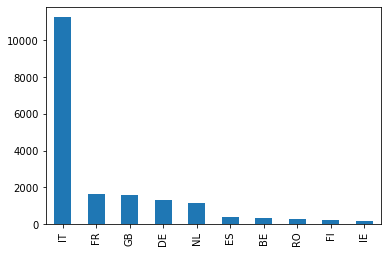

In [17]:
filtered_data.country.value_counts()[:10].plot(kind='bar')


In the given dataset, you can observe most of the customers are from the "Italy". So, we can filter data for Italy customer.



In [18]:
it_data=test[test.country=='IT']
it_data

,first_name,last_name,zip,city,country,conversion_name,conversion_date,conversion_id,conversion_value,conversion_value_margin,handling_cost,conversion_currency
0,be34ad33b31774df67565b3db888fa2361331e6566f1,1086b76dc02f395636156d9ca711d54a043f6640c690,92027,licata,IT,Purchase,2020-08-08,918183,377.00,154.22,18.0,EUR
1,e6d5c8867b7a46dc7b81cdc689e47fe84647d49022d6,bd3dae5fb91f88a4f0978222dfd58f59a124257cb081,36100,vicenza,IT,Cancel,2020-08-07,917656,-643.50,-48.29,-5.0,EUR
2,208ad55e4c4200ca42a73ab260efd6df57efccc95aad,3d67c6abd93267d5c5cb698b79401f76615b8f47f9a9,71016,san severo,IT,ReturnToSender,2020-08-07,905587,-318.50,-198.33,-183.1,EUR
3,f805bcb3efc982ec60744b3cc23f11ed1a4a0c4b783f,0f46ffbc599ddb2ebbd4b73dad90f240f502798a7986,20038,busto garolfo,IT,Purchase,2020-08-08,918391,462.80,307.12,44.0,EUR
4,09c12d01508bb6b857cf2f84199fb3134b58985806b4,cd165a891948a7ffae249980f8ca64e963f73f4116bc,10048,vinovo,IT,Cancel,2020-08-07,917776,-513.50,5.17,-5.0,EUR
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,fe301eaaac49b4652b8dfd9fb0e913683ac5600f5937,bcf8000222e6d32490a0b4b6e5354d0e40257eb3e385,30035,mirano,IT,Return,2019-12-17,757589,-2366.91,-840.40,-86.1,EUR
299996,1d6ee7d57c56fddd0854f2cccd1e07e4cd353b0a4af2,909b7ba3837585b82a9565255987deb1de0a6e8dee11,80055,portici,IT,Return,2019-01-28,564432,-2083.90,-477.07,-86.1,EUR
299997,5f3d6952c5c5e22077fabf461de80f1ce475752fe75a,bcb123d099bffaa2f909c78cc55ddd5b9790dbcebcf2,80059,torre del greco,IT,Return,2019-11-21,743357,-2381.60,-847.44,-86.1,EUR
299998,50c3f6a05d04086cf0a03ab106f9ed23dbefc3dbd976,3c73c06da1608a4fd90b2b946c615b373037fe37ad6b,37131,verona,IT,Return,2019-04-26,610021,-643.50,33.22,-86.1,EUR


In [19]:
it_data.describe()

,conversion_id,conversion_value,conversion_value_margin,handling_cost
count,280766.000000,280766.000000,280766.000000,280766.000000
mean,778092.080163,942.410533,273.879163,-61.404083
std,134059.528886,1527.085804,560.098732,38.438424
min,219371.000000,-341831.100000,-116096.530000,-274.100000
25%,657774.500000,507.000000,46.530000,-91.500000
50%,793713.000000,897.000000,244.420000,-66.500000
75%,897467.000000,1365.000000,484.990000,-33.500000
max,982191.000000,341831.100000,116096.530000,803.500000


# How many of the invoices were canceled?


In [20]:
test[test['conversion_name'].str.contains('Cancel',na=False)].count()


first_name                 8816
last_name                  8816
zip                        8816
city                       8816
country                    8816
conversion_name            8816
conversion_date            8816
conversion_id              8816
conversion_value           8816
conversion_value_margin    8816
handling_cost              8816
conversion_currency        8816
dtype: int64

totally 8816 cancelled invoices were found

# How much do company earn from each country?


In [21]:
test.groupby('country').agg({'conversion_value_margin':'sum'}).sort_values('conversion_value_margin',ascending=False).head().round(5)


,conversion_value_margin
country,
IT,76895957.16
GB,857109.11
FR,673747.03
DE,656131.63
NL,448157.05


In [22]:
today_date = dt.datetime(2022, 4, 13) 

test["conversion_date"].max()
#I will consider this day as analyze day.
today_date = dt.datetime(2010, 12, 11) 
#today = 2010-12-11


rfm analysis :

In [23]:
test['conversion_id'].value_counts().head()


568679    5
559379    4
557533    4
553193    4
560058    4
Name: conversion_id, dtype: int64

In [24]:
orders = test.groupby(['conversion_id', 'conversion_date', 'first_name']).agg({'conversion_value_margin': lambda x: x.sum()}).reset_index()
orders.head()


,conversion_id,conversion_date,first_name,conversion_value_margin
0,219371,2019-01-23,f805bcb3efc982ec60744b3cc23f11ed1a4a0c4b783f,0.00
1,349921,2019-03-08,8ec86ae7f3f198e5be02672361a18c0d45ea6a1c36a2,-134.31
2,378630,2019-10-29,4c381fab75cd791d10c0671903b6744b40ae52ab8ace,133.65
3,395751,2019-04-11,498acad3f3bdb27e004e64d0a53877d0ccdf3dcfc475,-62.92
4,458922,2019-09-30,9ab60eca6ebd10d283be1f9618361fa54e044ea3b685,-13.09


Finally, I am going to simulate an analysis I am doing in real time by setting the NOW date at one day after the last purchase. This date will be used as a reference to calculate the Recency score.



In [25]:
NOW = orders['conversion_date'].max() + timedelta(days=1)
NOW

Timestamp('2020-12-02 00:00:00')

In [26]:
period = 365


*Calculate the Recency, Frequency and Monetary Value of each customers*



To make things easier, I am going to add a column with the number of days between the purchase and now. To find the Recency values, I will just have to find the minimum of this column for each customer.

In [27]:
orders['DaysSinceOrder'] = orders['conversion_date'].apply(lambda x: (NOW - x).days)
orders['DaysSinceOrder']

0         679
1         635
2         400
3         601
4         429
         ... 
289305      1
289306      1
289307      1
289308      1
289309      1
Name: DaysSinceOrder, Length: 289310, dtype: int64

The scores are calculated for each customer. I need a dataframe with one row per customer. The scores will be stored in columns.



In [28]:
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # the number of days since last order (Recency)
    'conversion_date': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # the total number of orders in the last period (Frequency)
}
rfm = orders.groupby('first_name').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'conversion_date': 'Frequency'}, inplace=True)
rfm.head()


,first_name,Recency,Frequency
0,00025b9d16d03e66ec9af662547ade9d0149740b1e1b,488,0
1,0004a696d86a2cb147cd8a0a9e2eca67f54316239f5e,370,0
2,0009db9464476a70755db07322649cb21a30b4d4a94d,203,1
3,000e02e40e441be798211aaf86d037bacd3dedbc8a63,1,49
4,0010025afdfd672227093c0b21cb9f223236c1b1b229,6,3


I have the Recency and Frequency data. I need to add the Monetary value of each customer by adding sales over the last year.



In [29]:
rfm['Monetary'] = rfm['first_name'].apply(lambda x: orders[(orders['first_name'] == x) & \
                                                           (orders['conversion_date'] >= NOW - timedelta(days=period))]\
                                                           ['conversion_value_margin'].sum())
rfm.head()


,first_name,Recency,Frequency,Monetary
0,00025b9d16d03e66ec9af662547ade9d0149740b1e1b,488,0,0.00
1,0004a696d86a2cb147cd8a0a9e2eca67f54316239f5e,370,0,0.00
2,0009db9464476a70755db07322649cb21a30b4d4a94d,203,1,168.63
3,000e02e40e441be798211aaf86d037bacd3dedbc8a63,1,49,14234.66
4,0010025afdfd672227093c0b21cb9f223236c1b1b229,6,3,1248.39


Now we are going to calculate R,F,M scores

At this point, I have the values for Recency, Frequency and Monetary parameters. Each customer will get a note between 1 and 5 for each parameter.
We can do this by setting ranges based on expected behavior. For example, to rate Recency, we could use this scale:

1: 0-30 days

2: 31-60 days

3: 61-90 days

4: 91-180 days

5: 181-365 days

We could also use quintiles. Each quintiles contains 20% of the population. Using quintiles is more flexible as the ranges will adapt to the data and would work across different industries or if there's any change in expected customer behavior.
I am going to use the quintiles method. First, I get the quintiles for each parameter.



In [30]:
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles


{'Recency': {0.2: 38.0, 0.4: 128.0, 0.6: 230.0, 0.8: 439.0},
 'Frequency': {0.2: 0.0, 0.4: 1.0, 0.6: 1.0, 0.8: 3.0},
 'Monetary': {0.2: 0.0, 0.4: 38.61, 0.6: 317.9, 0.8: 781.3960000000005}}

Then I write methods to assign ranks from 1 to 5. A smaller Recency value is better whereas higher Frequency and Monetary values are better. I need to write two separate methods.

In [31]:
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    


I am now ready to get the R, F and M scores of each customer.



In [34]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))


# Get customers segments from RFM score


In [35]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()


,first_name,Recency,Frequency,Monetary,R,F,M,RFM Score
0,00025b9d16d03e66ec9af662547ade9d0149740b1e1b,488,0,0.00,1,1,1,111
1,0004a696d86a2cb147cd8a0a9e2eca67f54316239f5e,370,0,0.00,2,1,1,211
2,0009db9464476a70755db07322649cb21a30b4d4a94d,203,1,168.63,3,2,3,323
3,000e02e40e441be798211aaf86d037bacd3dedbc8a63,1,49,14234.66,5,5,5,555
4,0010025afdfd672227093c0b21cb9f223236c1b1b229,6,3,1248.39,5,4,5,545


I am going to work with 11 segments based on the R and F scores.

In [36]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()


,first_name,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,00025b9d16d03e66ec9af662547ade9d0149740b1e1b,488,0,0.00,1,1,1,111,hibernating
1,0004a696d86a2cb147cd8a0a9e2eca67f54316239f5e,370,0,0.00,2,1,1,211,hibernating
2,0009db9464476a70755db07322649cb21a30b4d4a94d,203,1,168.63,3,2,3,323,about to sleep
3,000e02e40e441be798211aaf86d037bacd3dedbc8a63,1,49,14234.66,5,5,5,555,champions
4,0010025afdfd672227093c0b21cb9f223236c1b1b229,6,3,1248.39,5,4,5,545,champions


# Visualize our customers segments




Now that we have our scores, we can do some data visualization to get a better idea of our customers portfolio. First, let see at the distribution of R, F and M.

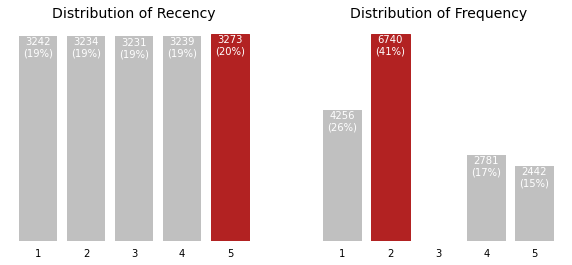

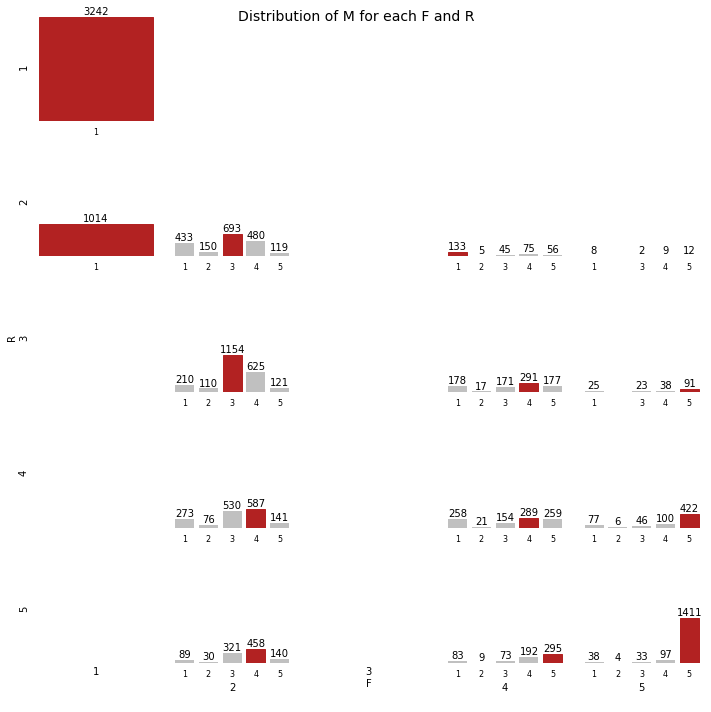

In [38]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R'] == r) & (rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

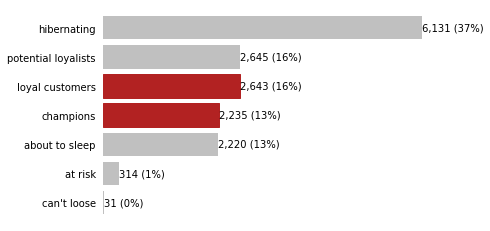

In [39]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()
